/media/NAS/

dentro 
- Truefake/ nuovi dati generati
- FORLAB/ immagini real
- TrueFace sia dati fake che real solo di facce.

In [1]:
path_TrueFace_PreSocial_Real = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Real/FFHQ"
path_TrueFace_PreSocial_Fake_StyleGAN_1 = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Fake/StyleGAN/images-psi-0.5"
path_TrueFace_PreSocial_Fake_StyleGAN_2 = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Fake/StyleGAN/images-psi-0.7"
path = "/media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Real/FFHQ"

Displaying image: 00000.png


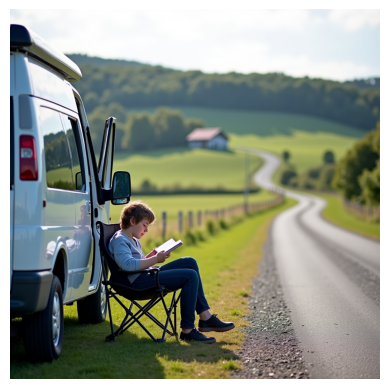

Image dimensions: 1024x1024 (width x height)


In [2]:
path = "/media/NAS/TrueFake/Extension/FLUX.1/general"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os #

cnt = 0
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    
    if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Displaying image: {file_name}")
        
        image = mpimg.imread(file_path)
        plt.imshow(image)
        plt.axis('off')  
        plt.show()
                
        height, width = image.shape[:2]
        print(f"Image dimensions: {width}x{height} (width x height)")
        break

# Dataloader